In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
t = np.linspace(0,1,1000)
analog_signal = np.sin(2*np.pi*200*t);

sampled_t = np.linspace(0,1,20);
sampled_signal = np.sin(2*np.pi*200*sampled_t);

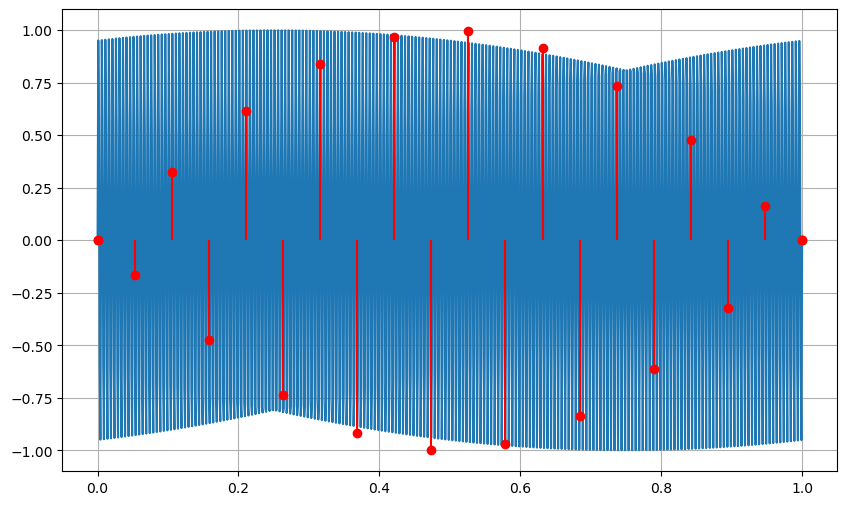

In [6]:
plt.figure(figsize=(10,6))
plt.plot(t, analog_signal)
plt.stem(sampled_t, sampled_signal, linefmt='r-', markerfmt='ro', basefmt='ro')
plt.grid()
plt.show()

In [8]:
import librosa
import librosa.display
from IPython.display import Audio

y, sr = librosa.load(librosa.ex('trumpet'))
Audio(y, rate=sr)

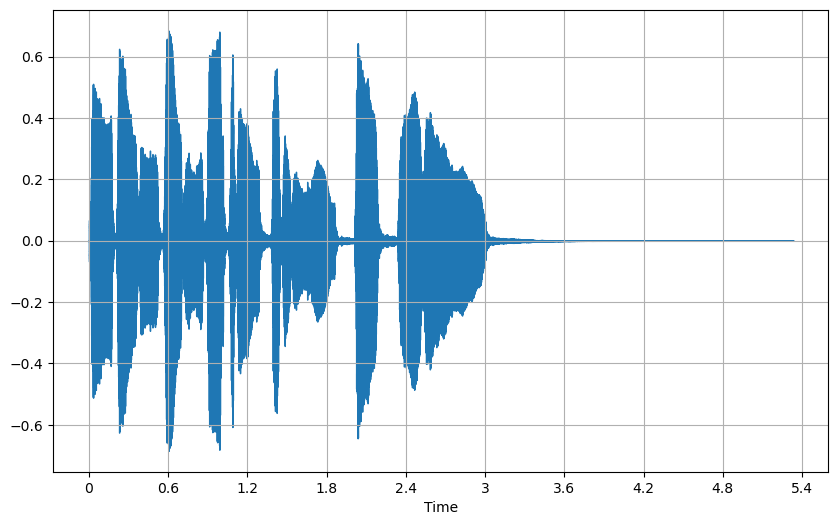

In [9]:
plt.figure(figsize=(10,6))
librosa.display.waveshow(y, sr=sr)
plt.grid()
plt.show()

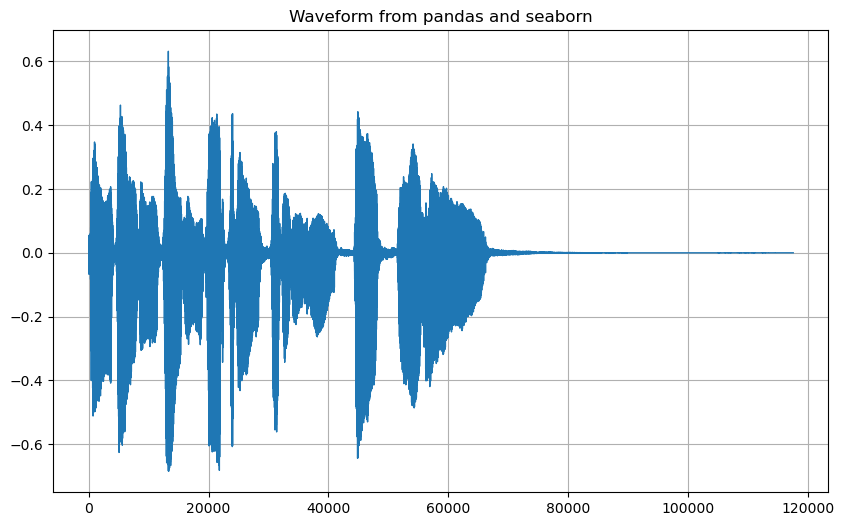

In [12]:
import seaborn as sns
import pandas as pd

color_pal = sns.color_palette()
pd.Series(y).plot(figsize=(10,6), lw=1, title='Waveform from pandas and seaborn', color=color_pal[0])
plt.grid()
plt.show()

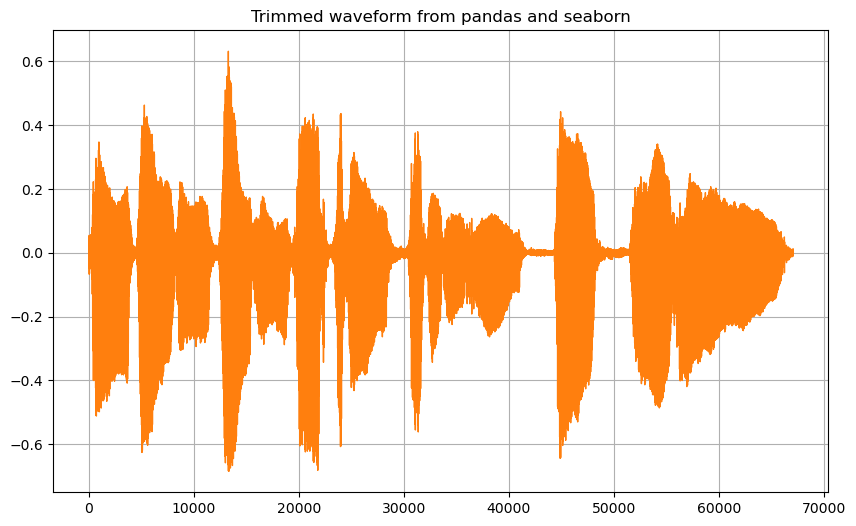

In [14]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,6), lw=1, title='Trimmed waveform from pandas and seaborn', color=color_pal[1])
plt.grid()
plt.show()

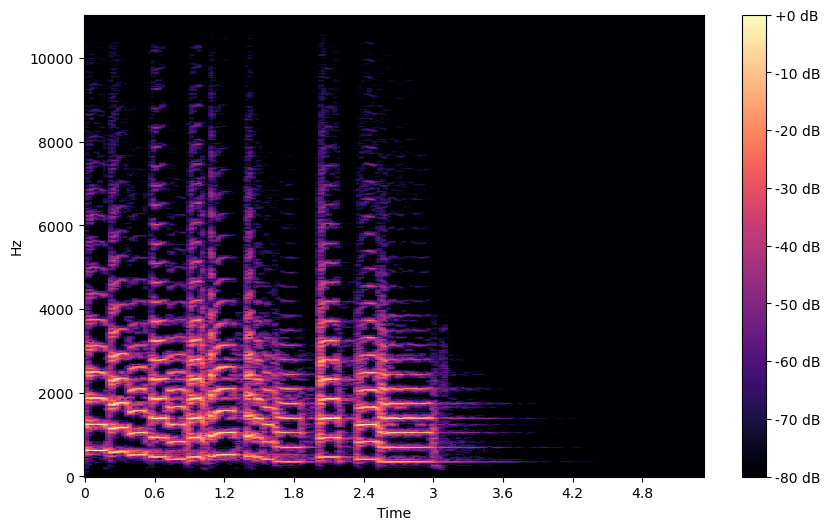

In [16]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,6))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [18]:
# from IPython.display import Audio, display, Javascript
# from google.colab import output
# import io
# import soundfile as sf

# RECORD = """
# const sleep = time => new Promise(resolve => setTimeout(resolve, time))
# const b2text = blob => new Promise(resolve => {
#   const reader = new FileReader();
#   reader.onloadend = () => resolve(reader.result);
#   reader.readAsDataURL(blob);
# });

# var record = async function() {
#   const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
#   const mediaRecorder = new MediaRecorder(stream);
#   let chunks = [];

#   mediaRecorder.ondataavailable = e => chunks.push(e.data);
#   mediaRecorder.start();

#   await sleep(5000); // Record 5 seconds
#   mediaRecorder.stop();

#   const stopped = new Promise(resolve => mediaRecorder.onstop = resolve);
#   await stopped;

#   const blob = new Blob(chunks);
#   const base64 = await b2text(blob);
#   return base64;
# }
# """

# display(Javascript(RECORD))
# data = output.eval_js('record()')

# import base64, uuid
# import io

# audio_bytes = base64.b64decode(data.split(',')[1])
# with open("my_voice.wav", "wb") as f:
#     f.write(audio_bytes)

# # Preview
# Audio("my_voice.wav")

In [20]:
import sounddevice as sd
import soundfile as sf
from IPython.display import Audio

# Parameters
duration = 5  # seconds
sample_rate = 44100  # standard audio sampling rate
filename = "my_voice.wav"

# Record audio
print("🎙️ Recording started...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()  # Wait until recording is finished
print("✅ Recording finished.")

# Save as WAV file
sf.write(filename, audio, sample_rate)

# Playback the audio
Audio(filename)


🎙️ Recording started...
✅ Recording finished.


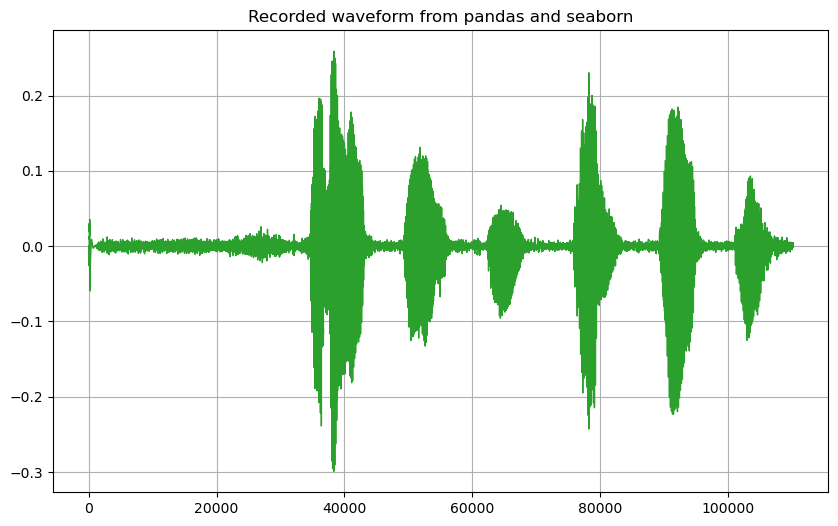

In [22]:
y, sr = librosa.load('my_voice.wav')
pd.Series(y).plot(figsize=(10,6), lw=1, title='Recorded waveform from pandas and seaborn', color=color_pal[2])
plt.grid()
plt.show()

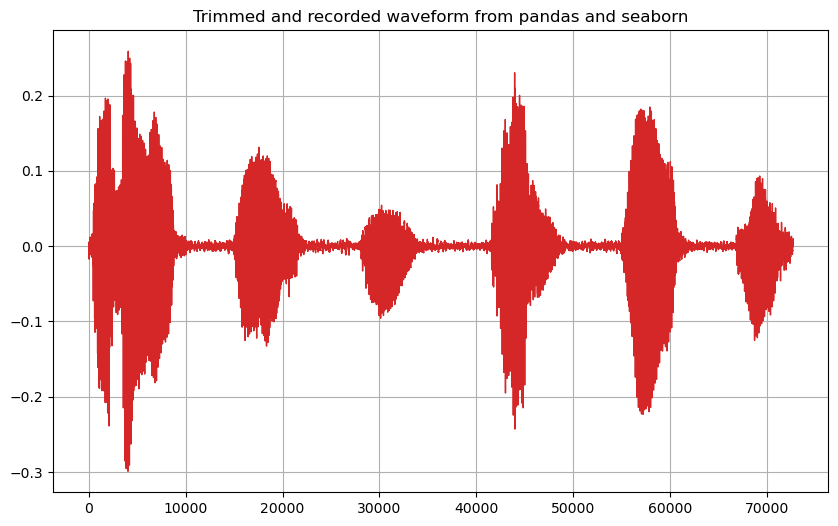

In [24]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,6), lw=1, title='Trimmed and recorded waveform from pandas and seaborn', color=color_pal[3])
plt.grid()
plt.show()

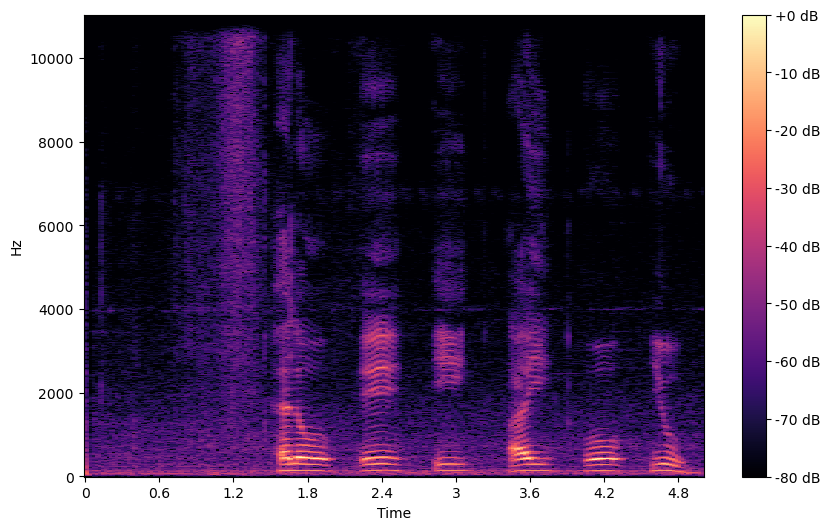

In [26]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,6))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.show()